# Data Cleaning Course

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset = pd.read_excel("customer_data_for_cleaning.xlsx")

In [5]:
dataset.head(3)

,CustomerID,FirstName,LastName,Email,PhoneNumber,Age,Gender,Address,City,State,ZipCode,Country,AccountBalance,SignupDate
0,1001,Joan,Wilson,email1@example.com,555-0123,46.0,Female,101 Pine St,Chicago,NY,10001,USA,1958.38,2022-07-20
1,1002,Jill,Moore,email2@example.com,555-0174,31.0,Female,202 Birch St,Phoenix,TX,77001,USA,13153.50,2020-10-21
2,1003,Jake,Wilson,NaN,NaN,NaN,Male,303 Cedar St,Houston,TX,60601,USA,13013.57,2022-01-24


## HANDLING MISSING VALUE

In [6]:
dataset["Age"].fillna(dataset["Age"].mean(), inplace=True)
dataset["Email"].fillna(method = "ffill" , inplace=True)
dataset["PhoneNumber"].fillna(method = "ffill" , inplace=True)


C:\Users\Z\AppData\Local\Temp\ipykernel_8008\1909440777.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Age"].fillna(dataset["Age"].mean(), inplace=True)
C:\Users\Z\AppData\Local\Temp\ipykernel_8008\1909440777.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

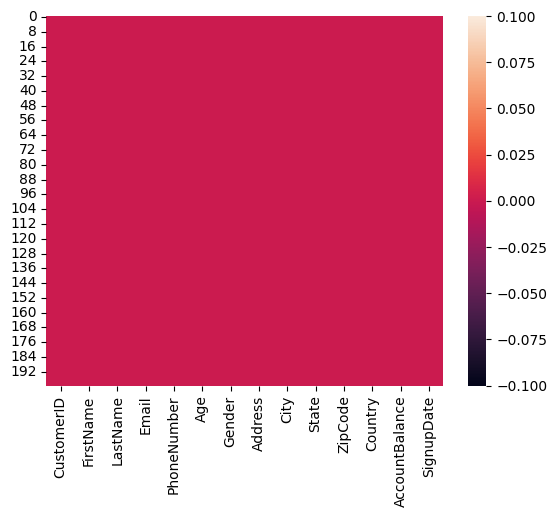

In [7]:
sns.heatmap(dataset.isnull())
plt.show()

## ENCODING
### OneHotEncoding

In [8]:
from sklearn.preprocessing import OneHotEncoder

In [9]:
ohe = OneHotEncoder(drop="first")
dataset["Gender"] = ohe.fit_transform(dataset[["Gender"]]).toarray()

In [10]:
dataset.head(3)

,CustomerID,FirstName,LastName,Email,PhoneNumber,Age,Gender,Address,City,State,ZipCode,Country,AccountBalance,SignupDate
0,1001,Joan,Wilson,email1@example.com,555-0123,46.000000,0.0,101 Pine St,Chicago,NY,10001,USA,1958.38,2022-07-20
1,1002,Jill,Moore,email2@example.com,555-0174,31.000000,0.0,202 Birch St,Phoenix,TX,77001,USA,13153.50,2020-10-21
2,1003,Jake,Wilson,email2@example.com,555-0174,46.955556,1.0,303 Cedar St,Houston,TX,60601,USA,13013.57,2022-01-24


### Label Encoding

In [11]:
df = pd.DataFrame({"name": ["moonSolution","cat","dog","cow","haroon"]})

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le = LabelEncoder()
df["en_name"] = le.fit_transform(df["name"])

In [14]:
df.head(3)

,name,en_name
0,moonSolution,4
1,cat,0
2,dog,2


### Ordinal Encoding

In [15]:
from sklearn.preprocessing import OrdinalEncoder

In [16]:
oe = OrdinalEncoder()    #categories=value/varaiable
dataset["City"] = oe.fit_transform(dataset[["City"]])
dataset["State"] = oe.fit_transform(dataset[["State"]])
dataset["Address"] = oe.fit_transform(dataset[["Address"]])

In [17]:
dataset.head(3)

,CustomerID,FirstName,LastName,Email,PhoneNumber,Age,Gender,Address,City,State,ZipCode,Country,AccountBalance,SignupDate
0,1001,Joan,Wilson,email1@example.com,555-0123,46.000000,0.0,0.0,0.0,3.0,10001,USA,1958.38,2022-07-20
1,1002,Jill,Moore,email2@example.com,555-0174,31.000000,0.0,2.0,4.0,4.0,77001,USA,13153.50,2020-10-21
2,1003,Jake,Wilson,email2@example.com,555-0174,46.955556,1.0,3.0,1.0,4.0,60601,USA,13013.57,2022-01-24


#### using map function ordinal encoding

In [18]:
df = pd.DataFrame({"size": ["s","m","l","xl","m","s","xl","s","l","m"]})

In [19]:
ord_data = {"xl":0,"l":1,"m":2,"s":3}

In [20]:
df["size_en"] = df["size"].map(ord_data)

In [21]:
df.head(3)

,size,size_en
0,s,3
1,m,2
2,l,1


## HANDLE OUTLIER
### Using IQR Method

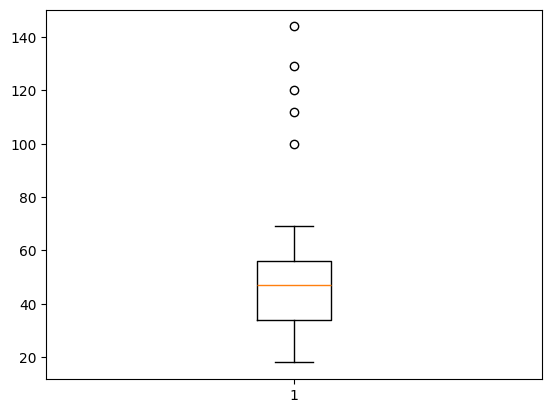

In [35]:
plt.boxplot(dataset["Age"])
plt.show()

In [29]:
q1 = dataset["Age"].quantile(0.25)
q3 = dataset["Age"].quantile(0.75)
IQR = q3 - q1

In [30]:
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

In [31]:
new_data = dataset[(dataset["Age"] >= lower_bound) & (dataset["Age"] <= upper_bound)]

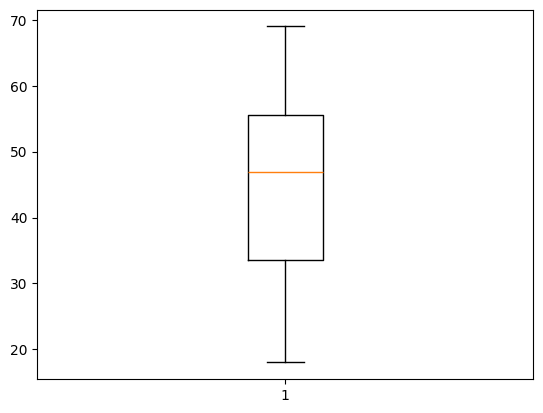

In [36]:

plt.boxplot(new_data["Age"])
plt.show()

## Outlier Removal Using Z Score

#### Direct Method

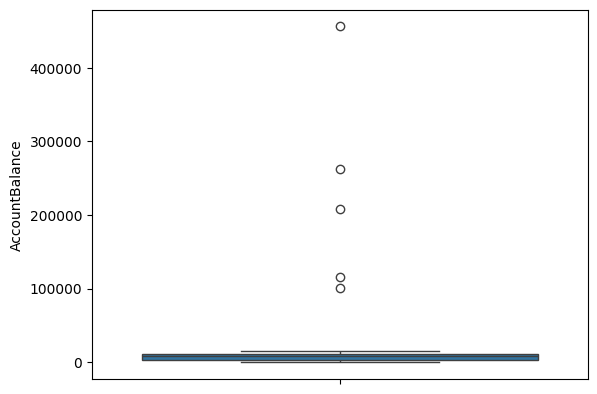

In [29]:
sns.boxplot(dataset["AccountBalance"])
plt.show()

In [30]:
min_range = dataset["AccountBalance"].mean() - (3*dataset["AccountBalance"].std())
max_range = dataset["AccountBalance"].mean() + (3*dataset["AccountBalance"].std())

In [31]:
n_data = dataset[dataset["AccountBalance"] <= max_range]

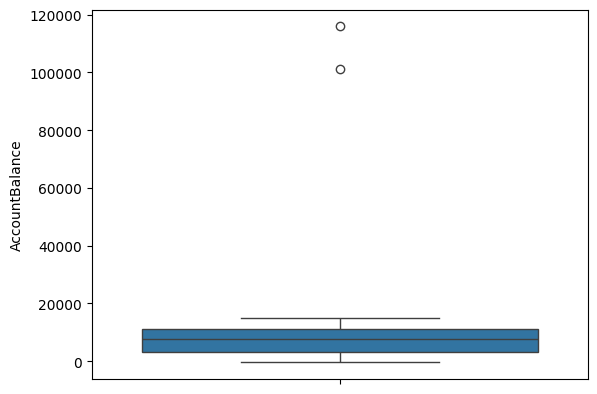

In [32]:
sns.boxplot(n_data["AccountBalance"])
plt.show()

#### Z-Score Method

In [33]:
z_score = (dataset["AccountBalance"] - dataset["AccountBalance"].mean()) / (dataset["AccountBalance"].std())

In [34]:
dataset["z_score"] = z_score

In [35]:
c = dataset[dataset["z_score"]<3]

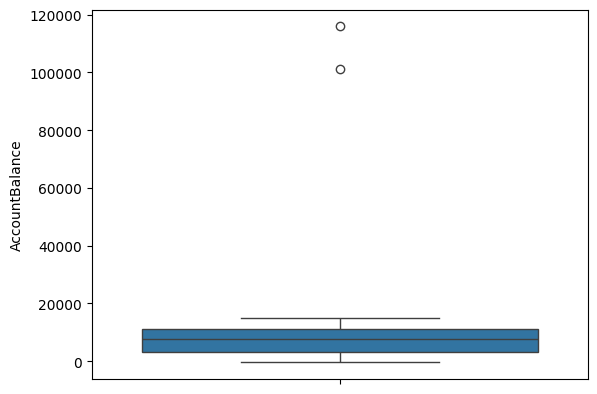

In [36]:
sns.boxplot(c["AccountBalance"])
plt.show()

## FEATURE SCALING (Standardization)

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
ss = StandardScaler()

In [39]:
ss.fit(dataset[["Age", "ZipCode"]])

StandardScaler()

In [40]:
dataset[["Age", "ZipCode"]] = pd.DataFrame(ss.transform(dataset[["Age", "ZipCode"]]))

In [41]:
dataset.head(3)

,CustomerID,FirstName,LastName,Email,PhoneNumber,Age,Gender,Address,City,State,ZipCode,Country,AccountBalance,SignupDate,z_score
0,1001,Joan,Wilson,email1@example.com,555-0123,-0.051945,0.0,0.0,0.0,3.0,-1.822661,USA,1958.38,2022-07-20,-0.269429
1,1002,Jill,Moore,email2@example.com,555-0174,-0.867357,0.0,2.0,4.0,4.0,0.434066,USA,13153.50,2020-10-21,0.007235
2,1003,Jake,Wilson,email2@example.com,555-0174,0.000000,1.0,3.0,1.0,4.0,-0.118327,USA,13013.57,2022-01-24,0.003777


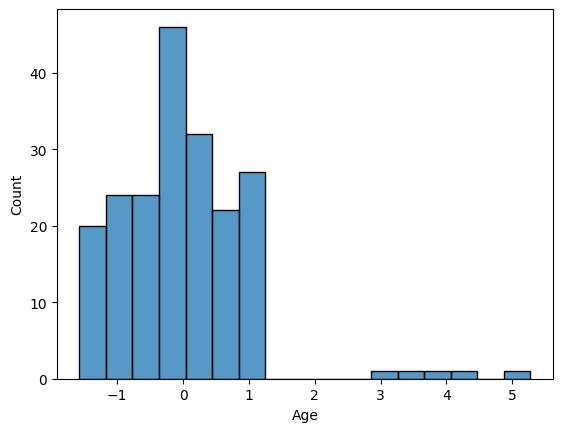

In [42]:
sns.histplot(dataset["Age"])
plt.show()

## FEATURE SCALING (Normalization)

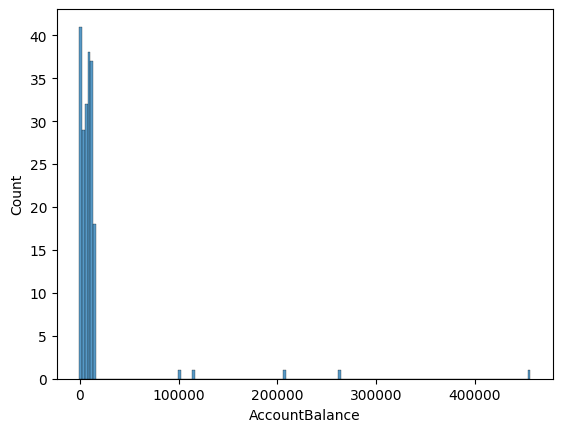

In [37]:
sns.histplot(dataset["AccountBalance"])
plt.show()

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
ms = MinMaxScaler()
ms.fit(dataset[["AccountBalance"]])

MinMaxScaler()

In [46]:
dataset[["AccountBalance"]] = pd.DataFrame(ms.transform(dataset[["AccountBalance"]]))

In [47]:
dataset.head()

,CustomerID,FirstName,LastName,Email,PhoneNumber,Age,Gender,Address,City,State,ZipCode,Country,AccountBalance,SignupDate,z_score
0,1001,Joan,Wilson,email1@example.com,555-0123,-0.051945,0.0,0.0,0.0,3.0,-1.822661,USA,0.005163,2022-07-20,-0.269429
1,1002,Jill,Moore,email2@example.com,555-0174,-0.867357,0.0,2.0,4.0,4.0,0.434066,USA,0.029660,2020-10-21,0.007235
2,1003,Jake,Wilson,email2@example.com,555-0174,0.000000,1.0,3.0,1.0,4.0,-0.118327,USA,0.029354,2022-01-24,0.003777
3,1004,Joan,Smith,email4@example.com,555-0135,-1.356604,1.0,3.0,4.0,0.0,0.703526,USA,0.000775,2020-07-04,-0.318980
4,1005,Jim,Brown,email5@example.com,555-0137,0.926550,0.0,5.0,2.0,3.0,-1.822661,USA,0.027793,2021-09-28,-0.013854


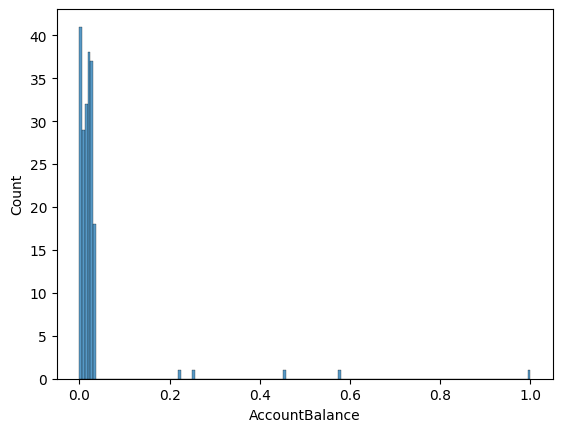

In [48]:
sns.histplot(dataset["AccountBalance"])
plt.show()

## Handle Duplicated Data

In [49]:
hdd = {"Name": ["a", "b", "c", "d", "b", "c"], "Eng": [2,3,5,7,3,6], "Urdu": [4,7,5,2,7,8]}

In [50]:
ddf = pd.DataFrame(hdd)

In [51]:
ddf

,Name,Eng,Urdu
0,a,2,4
1,b,3,7
2,c,5,5
3,d,7,2
4,b,3,7
5,c,6,8


In [52]:
ddf.drop_duplicates(inplace=True)

In [70]:
ddf

,Name,Eng,Urdu
0,a,2,4
1,b,3,7
2,c,5,5
3,d,7,2
5,c,6,8
